# Cumulative app version of fig 3

Cumulative yield

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

from math import log

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# from xgboost import XGBRegressor
# import shap


from plots2.fns import (
    # standard_layout,
    # corner_annotations_colwise,
    # corner_annotations_rowwise,
    # get_text_annotation,
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist
# from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
# from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

In [3]:
df = pd.read_csv('../outputs/combined/scan_all_cumyld.csv')

df.head()

,run,year,dose,yld,cum_yld,mu,b,asymptote,dec_rate_multiplier,m_prop_multiplier,m_scale_multiplier,ME_mean
0,0.0,1.0,1.0,10.021293,10.021293,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
1,0.0,2.0,1.0,10.021275,20.042568,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
2,0.0,3.0,1.0,10.021238,30.063805,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
3,0.0,4.0,1.0,10.021156,40.084961,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
4,0.0,5.0,1.0,10.020970,50.105931,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241


In [12]:
barchartdf = (
    df
    # .loc[:, ['dose', 'run', 'year']]
    
    .loc[:, ['dose', 'year']]
    
    
    
    .groupby('year')
    
    .value_counts()
    .reset_index()
    .rename(columns={0: 'count'})
    .pivot(index='year', columns='dose', values='count')
    
)

barchartdf.head(10)

dose,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
year,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,9999.0
4.0,NaN,1.0,3.0,7.0,10.0,10.0,13.0,14.0,5.0,9937.0
5.0,NaN,8.0,23.0,36.0,22.0,17.0,20.0,13.0,18.0,9843.0
6.0,1.0,32.0,65.0,41.0,29.0,30.0,28.0,22.0,29.0,9723.0
7.0,6.0,71.0,75.0,44.0,52.0,43.0,34.0,36.0,27.0,9612.0
8.0,13.0,108.0,77.0,65.0,66.0,52.0,38.0,30.0,40.0,9511.0
9.0,29.0,124.0,82.0,95.0,68.0,46.0,53.0,40.0,43.0,9420.0


<AxesSubplot:xlabel='year'>

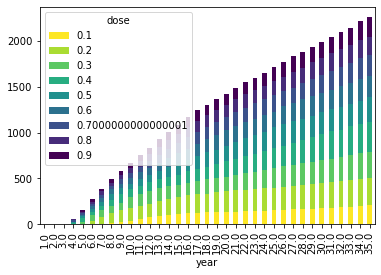

In [14]:
(
    barchartdf
    .iloc[:, :9]
    .plot
    .bar(
        stacked=True,
        colormap='viridis_r',
        legend=True
    )
)

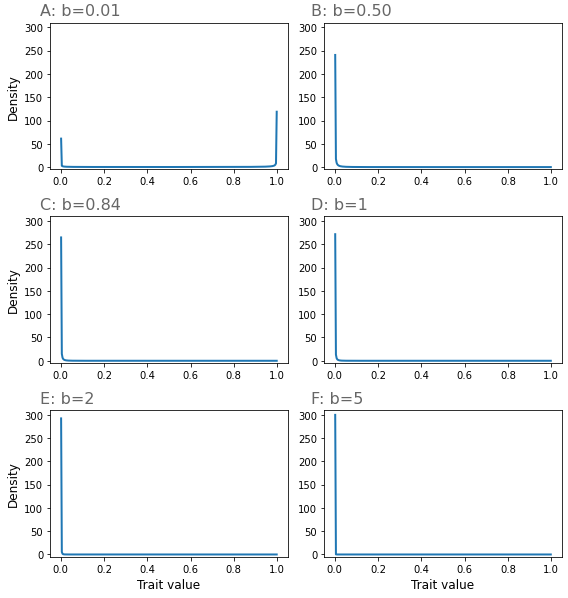

In [ ]:
f, ax = plt.subplots(
    3,
    2, 
    figsize=(8,9)
)

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

tv = trait_vec(cf.n_k)

bs = [0.01, 0.5, cf.k_b, 1, 2, 5]

for ii, b in enumerate(bs):
    
    rr = floor(ii/2)
    cc = ii%2

    a = cf.k_mu*b
    yy = gamma_dist(cf.n_k, a, b)
    
    yy = yy/np.sum(yy)
    
    yy = yy / (tv[1] - tv[0])
    
    ax[rr][cc].plot(tv, yy, lw=2)
    ax[rr][cc].set_ylim([-5, 310])

f.patch.set_facecolor('white')

ax[0][0].set_xlabel(None)
ax[0][1].set_xlabel(None)
ax[1][0].set_xlabel(None)
ax[1][1].set_xlabel(None)
ax[2][0].set_xlabel('Trait value')
ax[2][1].set_xlabel('Trait value')

ax[0][0].set_ylabel('Density')
ax[1][0].set_ylabel('Density')
ax[2][0].set_ylabel('Density')
ax[0][1].set_ylabel(None)
ax[1][1].set_ylabel(None)
ax[2][1].set_ylabel(None)

plt.tight_layout(rect=[0,0,1,0.91], h_pad=3)

letters = 'ABCDEF'
labels = []
for ii in range(6):
    if ii<3:
        labels.append(f'{letters[ii]}: b={bs[ii]:.2f}')
    else:
        labels.append(f'{letters[ii]}: b={bs[ii]}')
    

get_corner_annotations_custom_labels(2, 3, 0.07, 0.9, 0.47, 0.30, plt, labels=labels)

# f

## Save

In [21]:
# f.savefig('../figures/paper/app1_fig1.jpg', dpi=300, bbox_inches="tight")